# Loading data and visualizing the corpus

## Load the data

First, we need to load the data into the Notebook. We do this by using [pandas](https://pandas.pydata.org/), which is a powerfool and widely used tool for data analysis in Python.

### Import pandas into the notebook

In [1]:
import pandas as pd

### Store corpus in a pandas DataFrame

In [2]:
vaderland = pd.read_csv("data/HetVaderland_1873.csv", index_col = 0)

In [3]:
standaard = pd.read_csv("data/DeStandaard_1873.csv", index_col = 0)

In [4]:
vaderland.head(2)

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied
0,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,Ontwerp van wet tot wijziging der wetten betre...,1873/04/25 00:00:00,"’s Graven hage, 24 April.! m- Om de re^e&eu, i...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk
1,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396098:mpeg21,artikel,De strijd tegen den Nederlandschen Sigarenmake...,1873/04/25 00:00:00,11. De positie der sigarenmakers in Nederland ...,Het vaderland : staat- en letterkundig nieuwsblad,Landelijk


In [5]:
standaard.head(2)

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied
0,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065451:mpeg21,artikel,Algemeen Overzicht.,1873/01/02 00:00:00,Hot gunstig oordeel dat do meeste buitenlandsc...,De standaard,Landelijk
1,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065451:mpeg21,artikel,FEUILLETON. „Vassar College.”,1873/01/02 00:00:00,Wie gaarno de hand in brandnetels of wespennes...,De standaard,Landelijk


### Combine the datasets into one big DataFrame

In [6]:
data = pd.concat([vaderland, standaard])

### Add month and day to dataset

In [7]:
data["date"] = pd.to_datetime(data["date"])

In [8]:
data['month'] = data['date'].dt.strftime("%B")
data['day'] = data['date'].dt.strftime("%A")

In [66]:
data.head()

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day
914,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Handelsberichten.,1873-01-01,"Amsterdam, 30 December. P Granen. Tarwe: O. wi...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday
907,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Residentienieuws.,1873-01-01,"Men verzekert ons, dat eenige leden van de Twe...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday
908,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,"Korte berichten uit het Binnenland,",1873-01-01,Op den tweeden Kerstdag viel de conducteur G. ...,Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday
909,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Onderwijs Lager Onderwijs Vacante planteen voo...,1873-01-01,"Te Ommelauderwijk, a ƒ4OO en vrije woning; te ...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday
910,http://resolver.kb.nl/resolve?urn=MMKB23:00139...,KRANTEN:MMKB23:MMKB23:001396001:mpeg21,artikel,Vacante plaatsen voor Hulponderwijzers.,1873-01-01,"Te Alkmaar, a ƒ400; —le Alfen, k ƒ 450; —te Be...",Het vaderland : staat- en letterkundig nieuwsblad,Landelijk,January,Wednesday


We have now added the month and day on which an article was published in separate columns. For future purposes, it is convenient to sort the DataFrame by date.

In [67]:
data = data.sort_values(by='date')

## Visualise the data

### Unique number of newspapers

In [50]:
unique_newspapers = data.groupby('krantnaam')['oaiIdentifier'].nunique()
df_unique_newspapers = unique_newspapers.to_frame(name='unique_value')
df_unique_newspapers

,unique_value
krantnaam,
De standaard,307
Het vaderland : staat- en letterkundig nieuwsblad,309


<Axes: title={'center': 'Unique number of newspaper issues in 1873 (in Delpher)'}, ylabel='krantnaam'>

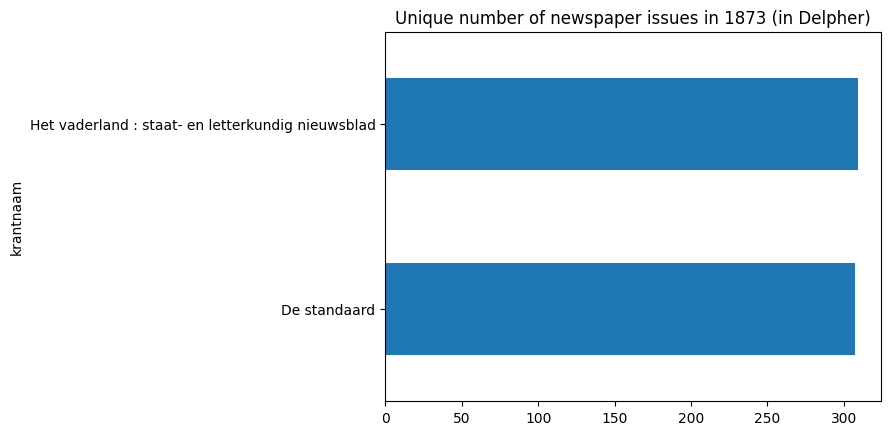

In [11]:
unique_newspapers.plot(kind = 'barh', title = "Unique number of newspaper issues in 1873 (in Delpher)")

In [12]:
import plotly.express as px

In [13]:
fig = px.bar(unique_newspapers,
             orientation='h',
             title='Unique number of newspaper issues in 1873 (in Delpher)')
fig.show()

We now have a pretty good visualization of the distribution of newspapers in the corpus. Of course, there are more possibilities when it comes to visualizing the basic information of a corpus. Let's see how we can use Plotly to create a pie chart.

In [45]:
fig = px.pie(df_unique_newspapers,
             values='unique_value',
             names=['De Standaard', 'Het Vaderland'],
             title='Distribution of newspapers in corpus')

fig.show()

### Number of articles per newspaper

In [15]:
unique_articles = data.groupby('krantnaam')['identifier'].nunique()

plt = px.bar(unique_articles,
             orientation='h',
             title='Number of unique articles')

plt.show()

### Numbers of unique newspapers per month

In [16]:
month_values = data.groupby(['month'])['oaiIdentifier'].nunique()

fig = px.bar(data,
    x=data['month'].unique(),
    y=month_values,
    labels={'x': 'Month', 'y': 'Total number of newspapers'},
    title='Total number of newspaper issues per month'
)

fig.show()


TODO (?): create grouped bar plot with number of newspapers per newspaper title per month

### Days on which the newspaper were published

In [23]:
weekday_values = data.groupby(['day'])['oaiIdentifier'].nunique()

fig = px.bar(data,
    x=data['day'].unique(),
    y=weekday_values,
    labels={'x': 'Day', 'y': 'Total number of newspapers'},
    title='Total number of newspaper issues per day of the week'
)

fig.update_xaxes(
    categoryorder='array',
    categoryarray=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)

fig.show()

### Average OCR quality??

(Misschien kunnen we van tevoren een basisc woordenboek lookup doen en dat hier plotten??).
In het kader van bronnenkritiek en omdat het oude kranten zijn.

En dan misschien ook iets visualiseren van als je alleen artikelen met een kwaliteit van 80% of hoger hebt hoeveel van je corpus je dan overhoudt?